# MIGRAZIONI IN ITALIA
* * *

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

+ **PUNTO 1: NUMERO MIGRANTI IN ITALIA nei recenti anni**

Per prima cosa importo il dataframe della popolazione straniera residente in italia suddivisa per anni (2017, 2018, 2019), sesso e regione.

In [2]:
residenti_totale = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/stranieri_residenti.csv")
residenti_totale = residenti_totale.rename(columns= {'Tipo di indicatore demografico' : 'index', 'Seleziona periodo' : 'periodo', 'Value':'valore'})
residenti_totale = pd.DataFrame(data= residenti_totale, columns=['Territorio', 'index', 'Sesso', 'periodo', 'valore'])
residenti_totale

,Territorio,index,Sesso,periodo,valore
0,Italia,popolazione straniera al 1° gennaio,maschi,2017,2404129
1,Italia,popolazione straniera al 1° gennaio,maschi,2018,2471722
2,Italia,popolazione straniera al 1° gennaio,maschi,2019,2540471
3,Italia,nati vivi stranieri,maschi,2017,34883
4,Italia,nati vivi stranieri,maschi,2018,33671
...,...,...,...,...,...
28939,Sud Sardegna,stranieri cancellati in anagrafe per l'estero,totale,2018,121
28940,Sud Sardegna,stranieri cancellati in anagrafe per l'estero,totale,2019,163
28941,Sud Sardegna,popolazione straniera residente in famiglia,totale,2017,5858
28942,Sud Sardegna,popolazione straniera residente in famiglia,totale,2018,5811


Successivamente seleziono le righe contentente il numero totale di popolazione residente al 31 dicembre e creo un dataframe per ogni anno.

In [3]:
residenti = residenti_totale.loc[(residenti_totale['index']== 'popolazione straniera al 31 dicembre')]
residenti = residenti.loc[(residenti['Territorio'] == 'Italia')]
residenti = residenti.loc[(residenti['Sesso']== 'totale')]
residenti

,Territorio,index,Sesso,periodo,valore
9657,Italia,popolazione straniera al 31 dicembre,totale,2017,5144440
9658,Italia,popolazione straniera al 31 dicembre,totale,2018,5255503
9659,Italia,popolazione straniera al 31 dicembre,totale,2019,5306548


In [4]:
residenti_2017 = residenti.iloc[0:1]
residenti_2017.head()

,Territorio,index,Sesso,periodo,valore
9657,Italia,popolazione straniera al 31 dicembre,totale,2017,5144440


In [5]:
residenti_2018 = residenti.iloc[1:-1]
residenti_2018.head()

,Territorio,index,Sesso,periodo,valore
9658,Italia,popolazione straniera al 31 dicembre,totale,2018,5255503


In [6]:
residenti_2019 = residenti.iloc[2:]
residenti_2019.head()

,Territorio,index,Sesso,periodo,valore
9659,Italia,popolazione straniera al 31 dicembre,totale,2019,5306548


Visioniamo la variazione di persone straniere residenti in Italia dal 2017 al 2019.

Il numero è in leggero aumento ma non in modo significativo.

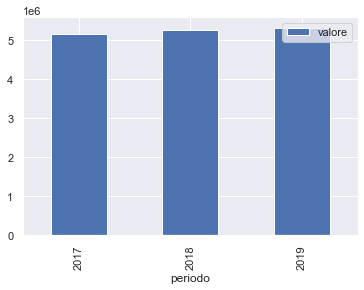

In [7]:
residenti.plot(x='periodo', y='valore', kind='bar')

+ **PUNTO 2: PER QUALI MOTIVI LE PERSONE MIGRANO IN ITALIA esempio 2018**

Estrapolo dai dataframe i motivi dei permessi di soggiorno.

In [8]:
permesso_sogg = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/permesso_soggiorno.csv")
permesso_sogg = permesso_sogg.rename(columns= {'Principali Paesi di cittadinanza' : 'paese_cittadinanza', 'Motivo del permesso' : 'motivo_permesso', 'Seleziona periodo':'periodo', 'Value' : 'valore'})
permesso_sogg = pd.DataFrame(data=permesso_sogg, columns=['Sesso', 'paese_cittadinanza', 'motivo_permesso', 'periodo', 'valore'])
permesso_sogg

,Sesso,paese_cittadinanza,motivo_permesso,periodo,valore
0,maschi,Albania,lavoro,2018,1384
1,maschi,Albania,famiglia,2018,6964
2,maschi,Albania,studio,2018,205
3,maschi,Albania,"asilo, richiesta asilo e motivi umanitari",2018,426
4,maschi,Albania,"residenza elettiva, religione, salute",2018,2570
...,...,...,...,...,...
34907,femmine,Serbia/Kosovo/Montenegro,"asilo, richiesta asilo e motivi umanitari",2018,2
34908,maschi,Serbia/Kosovo/Montenegro,"residenza elettiva, religione, salute",2018,1
34909,femmine,Serbia/Kosovo/Montenegro,studio,2018,3
34910,femmine,Serbia/Kosovo/Montenegro,"residenza elettiva, religione, salute",2018,1


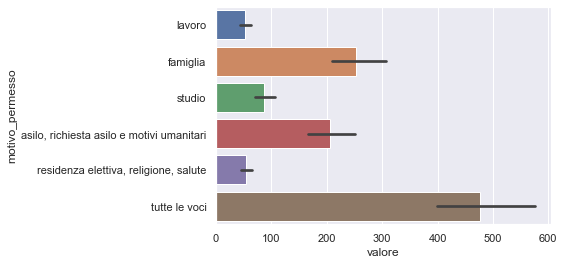

In [9]:
sns.set_style(style="darkgrid")
sns.color_palette("husl", 9)
sns.barplot(data=permesso_sogg, x='valore', y='motivo_permesso', orient='h')

Suddividiamo sulla base del sesso

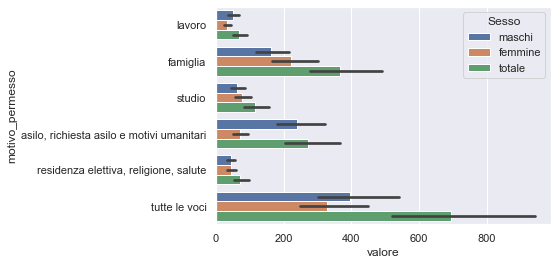

In [10]:
sns.barplot(data=permesso_sogg, x='valore', y='motivo_permesso', hue='Sesso', orient='h')

+ **PUNTO 3: OCCUPAZIONE E DISOCCUPAZIONE, in che cosa sono occupati?**

OCCUPAZIONE analizziamo i tassi di occupazione della popolazione straniera in Italia 

In [11]:
occupati = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/tasso_occup.csv")
occupati = occupati.rename(columns= {'Titolo di studio' : 'titolo_di_studio', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
occupati = pd.DataFrame(data=occupati, columns=['Sesso', 'Territorio', 'Cittadinanza', 'titolo_di_studio', 'periodo', 'valore'])
occupati

,Sesso,Territorio,Cittadinanza,titolo_di_studio,periodo,valore
0,maschi,Italia,straniero-a,"licenza di scuola elementare, nessun titolo di...",2019,70.132598
1,maschi,Italia,straniero-a,"licenza di scuola elementare, nessun titolo di...",T1-2019,66.645359
2,maschi,Italia,straniero-a,"licenza di scuola elementare, nessun titolo di...",T2-2019,69.608896
3,maschi,Italia,straniero-a,"licenza di scuola elementare, nessun titolo di...",T4-2019,69.782218
4,maschi,Italia,straniero-a,"licenza di scuola elementare, nessun titolo di...",T3-2019,74.749894
...,...,...,...,...,...,...
385,totale,Mezzogiorno,straniero-a,laurea e post-laurea,T2-2019,53.083763
386,totale,Mezzogiorno,straniero-a,laurea e post-laurea,T4-2019,48.177114
387,totale,Mezzogiorno,straniero-a,laurea e post-laurea,T3-2019,63.885869
388,totale,Mezzogiorno,straniero-a,laurea e post-laurea,T2-2020,54.683002


In [12]:
#ESEMPIO nel 2019
mask_occupati = occupati['periodo'] == '2019'
occupati_2019 = occupati.loc[(occupati['periodo'] == '2019')]
occupati_2019

,Sesso,Territorio,Cittadinanza,titolo_di_studio,periodo,valore
0,maschi,Italia,straniero-a,"licenza di scuola elementare, nessun titolo di...",2019,70.132598
7,maschi,Italia,straniero-a,licenza di scuola media,2019,70.136965
14,maschi,Italia,straniero-a,diploma,2019,79.835145
21,maschi,Italia,straniero-a,laurea e post-laurea,2019,81.119986
28,maschi,Italia,straniero-a,totale,2019,74.022284
...,...,...,...,...,...,...
373,maschi,Mezzogiorno,straniero-a,totale,2019,63.675059
380,femmine,Mezzogiorno,straniero-a,licenza di scuola media,2019,43.713426
381,femmine,Mezzogiorno,straniero-a,diploma,2019,42.537387
382,maschi,Mezzogiorno,straniero-a,"licenza di scuola elementare, nessun titolo di...",2019,64.844292


Visioniamo le differenze territoriali.

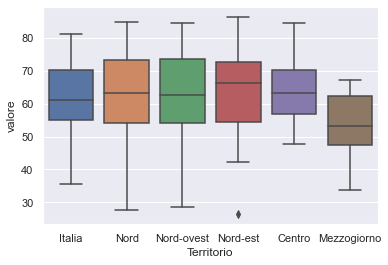

In [13]:
sns.boxplot(data=occupati_2019, x='Territorio', y='valore')

Il tasso di occupazione sulla base del proprio titolo di studio.

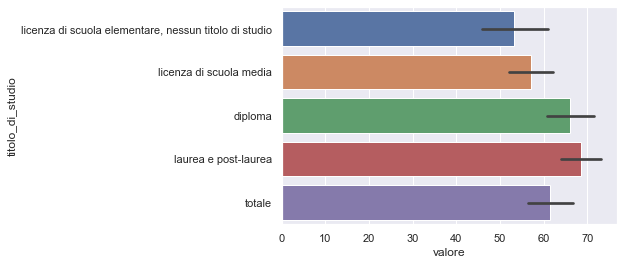

In [14]:
sns.barplot(data=occupati_2019, x='valore', y='titolo_di_studio', orient='h')

+ **QUANTI STRANIERI NON SI FERMANO ALLE SUPERIORI E PROSEGUONO ALL'UNIVERSITA'**

In [15]:
universita = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/stranieri_uni.csv")
universita = universita.rename(columns= {'AnnoA' : 'anno', 'AteneoNOME' : 'ateneo', 'CorsoTIPO' : 'tipo_corso', 'CittadinanzaNOME' : 'cittadinanza', 'Isc_S': 'valore'})
universita = pd.DataFrame(data=universita, columns=['anno', 'ateneo', 'tipo_corso', 'Continente', 'cittadinanza', 'valore'])
universita

,anno,ateneo,tipo_corso,Continente,cittadinanza,valore
0,2018/2019,Torino,Laurea,EUROPA-UE,Romania,983
1,2018/2019,Roma La Sapienza,Laurea,EUROPA-UE,Romania,945
2,2018/2019,Milano Politecnico,Laurea Magistrale,ASIA,Cina,916
3,2018/2019,Milano Politecnico,Laurea Magistrale,ASIA,India,771
4,2018/2019,Milano Politecnico,Laurea Magistrale,ASIA,Iran,717
...,...,...,...,...,...,...
1495,2018/2019,Genova,Laurea,SUD AMERICA,Bolivia,10
1496,2018/2019,Brescia,Laurea Magistrale,EUROPA,Moldavia,10
1497,2018/2019,Bergamo,Laurea Magistrale,SUD AMERICA,Bolivia,10
1498,2018/2019,Milano Bicocca,Laurea Magistrale Ciclo Unico,ASIA,Iran,10


Da quali Paesi arrivano?

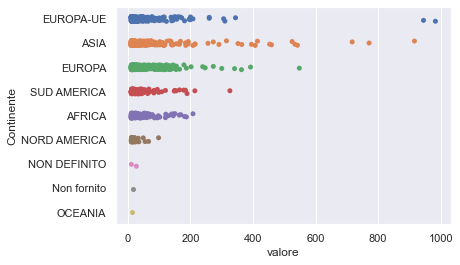

In [16]:
sns.stripplot(data=universita, x='valore', y='Continente', orient='h')

DISOCCUPAZIONE visioniamo i tassi

In [17]:
disoccupati = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/tasso_disoccup.csv")
disoccupati = disoccupati.rename(columns= {'Titolo di studio' : 'titolo_di_studio', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
disoccupati.head()

,ITTER107,Territorio,TIPO_DATO_FOL,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,TITOLO_STUDIO,titolo_di_studio,CITTADINANZA,Cittadinanza,TIME,periodo,valore,Flag Codes,Flags
0,IT,Italia,UNEM_R,tasso di disoccupazione,1,maschi,Y_GE15,15 anni e più,3,"licenza di scuola elementare, nessun titolo di...",FRG,straniero-a,2019,2019,14.237611,NaN,NaN
1,IT,Italia,UNEM_R,tasso di disoccupazione,1,maschi,Y_GE15,15 anni e più,3,"licenza di scuola elementare, nessun titolo di...",FRG,straniero-a,2019-Q1,T1-2019,17.925378,NaN,NaN
2,IT,Italia,UNEM_R,tasso di disoccupazione,1,maschi,Y_GE15,15 anni e più,3,"licenza di scuola elementare, nessun titolo di...",FRG,straniero-a,2019-Q2,T2-2019,14.756560,NaN,NaN
3,IT,Italia,UNEM_R,tasso di disoccupazione,1,maschi,Y_GE15,15 anni e più,3,"licenza di scuola elementare, nessun titolo di...",FRG,straniero-a,2019-Q4,T4-2019,14.365419,NaN,NaN
4,IT,Italia,UNEM_R,tasso di disoccupazione,1,maschi,Y_GE15,15 anni e più,3,"licenza di scuola elementare, nessun titolo di...",FRG,straniero-a,2019-Q3,T3-2019,9.799707,NaN,NaN


Tassi in base al titolo di studio conseguito

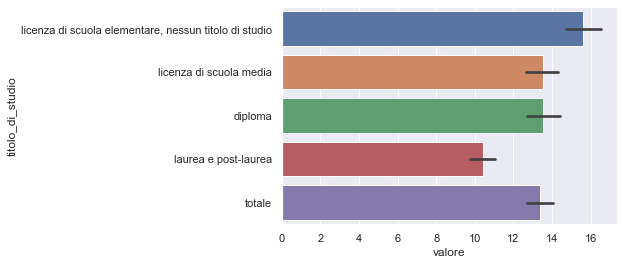

In [18]:
sns.barplot(data=disoccupati, x='valore', y='titolo_di_studio', orient='h')

+ **CHE TIPOLOGIA DI ATTIVITA' SVOLGONO?**

In [19]:
tipo_occup = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/occupaz_str.csv")
tipo_occup = tipo_occup.rename(columns={'Professione 2011' : 'Professione', 'Seleziona periodo': 'periodo', 'Value' : 'valore'})
tipo_occup = pd.DataFrame(data= tipo_occup, columns=['Territorio', 'Sesso', 'Professione', 'periodo', 'valore'])
tipo_occup

,Territorio,Sesso,Professione,periodo,valore
0,Italia,maschi,qualificate e tecniche,2019,92.588
1,Italia,maschi,qualificate e tecniche,T1-2019,83.485
2,Italia,maschi,qualificate e tecniche,T2-2019,84.787
3,Italia,maschi,qualificate e tecniche,T4-2019,101.517
4,Italia,maschi,qualificate e tecniche,T3-2019,100.564
...,...,...,...,...,...
265,Nord-ovest,maschi,totale,T1-2020,470.155
266,Mezzogiorno,maschi,qualificate e tecniche,2019,6.655
267,Mezzogiorno,maschi,impiegati e addetti al commercio e servizi,2019,35.698
268,Mezzogiorno,maschi,personale non qualificato,2019,113.659


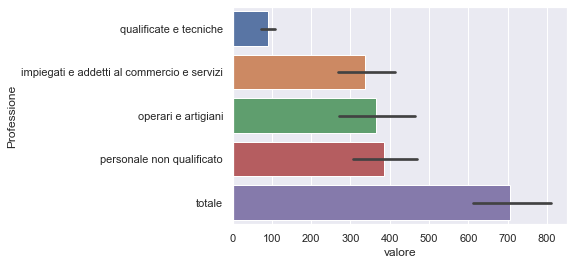

In [20]:
sns.barplot(data=tipo_occup, x='valore', y='Professione', orient='h')

Commenti a proposito: lavore generalmente poco qualificato

+ **PUNTO 4: POSSIBILI ASPETTI NEGATIVI? deliquenza**

Prendo in considerazione gli stranieri che hanno commesso delitti e/o delinquenze sul territorio italiano.

In [21]:
delinquenza = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/delinquenza.csv")
delinquenza = delinquenza.rename(columns={'TIPO_DATO35' : 'posizione_sogg', 'Tipo di delitto': 'tipo_delitto', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
delinquenza = delinquenza.loc[delinquenza['posizione_sogg'] == 'OFFEND']
delinquenza 

,ITTER107,Territorio,posizione_sogg,Tipo dato,REATI_PS,tipo_delitto,SEXISTAT1,Sesso,ETA1,Classe di età,CITTADINANZA,Cittadinanza,TIME,periodo,valore,Flag Codes,Flags
0,IT,Italia,OFFEND,numero di autori di delitto denunciati/arresta...,MASSMURD,strage,1,maschi,Y18-24,18-24 anni,FRG,straniero-a,2018,2018,2,NaN,NaN
1,IT,Italia,OFFEND,numero di autori di delitto denunciati/arresta...,MASSMURD,strage,2,femmine,Y18-24,18-24 anni,FRG,straniero-a,2018,2018,0,NaN,NaN
2,IT,Italia,OFFEND,numero di autori di delitto denunciati/arresta...,INTENHOM,omicidi volontari consumati,1,maschi,Y18-24,18-24 anni,FRG,straniero-a,2018,2018,46,NaN,NaN
4,IT,Italia,OFFEND,numero di autori di delitto denunciati/arresta...,INTENHOM,omicidi volontari consumati,2,femmine,Y18-24,18-24 anni,FRG,straniero-a,2018,2018,4,NaN,NaN
6,IT,Italia,OFFEND,numero di autori di delitto denunciati/arresta...,ROBBHOM,omicidi volontari consumati a scopo di furto o...,1,maschi,Y18-24,18-24 anni,FRG,straniero-a,2018,2018,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,IT,Italia,OFFEND,numero di autori di delitto denunciati/arresta...,SMUGGL,contrabbando,1,maschi,Y55-64,55-64 anni,FRG,straniero-a,2018,2018,3,NaN,NaN
1349,IT,Italia,OFFEND,numero di autori di delitto denunciati/arresta...,OTHCRIM,altri delitti,1,maschi,Y55-64,55-64 anni,FRG,straniero-a,2018,2018,3476,NaN,NaN
1350,IT,Italia,OFFEND,numero di autori di delitto denunciati/arresta...,OTHCRIM,altri delitti,2,femmine,Y55-64,55-64 anni,FRG,straniero-a,2018,2018,1460,NaN,NaN
1351,IT,Italia,OFFEND,numero di autori di delitto denunciati/arresta...,TOT,totale,1,maschi,Y55-64,55-64 anni,FRG,straniero-a,2018,2018,7372,NaN,NaN


Che tipologie di azioni commettono? Sono in numero significativo?

In [22]:
delinquenza['valore'].count()

896

+ **PUNTO 5: ASPETTI POSITIVI: ALTA FECONDITA'**

Analizziamo i tassi totali di fecondità delle donne straniere.

In [23]:
fecondita = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/fecondita.csv")
fecondita = fecondita.rename(columns={'Tipo dato' : 'tipo_dato', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
fecondita = fecondita.loc[fecondita['tipo_dato']== 'tasso di fecondità totale']
fecondita 

,ITTER107,Territorio,TIPO_DATO15,tipo_dato,CITTADINANZA,Cittadinanza,TIME,periodo,valore,Flag Codes,Flags
0,IT,Italia,TOTFERR,tasso di fecondità totale,FRG,straniero-a,2018,2018,1.94,NaN,NaN
2,ITC,Nord-ovest,TOTFERR,tasso di fecondità totale,FRG,straniero-a,2018,2018,2.03,NaN,NaN
4,ITC1,Piemonte,TOTFERR,tasso di fecondità totale,FRG,straniero-a,2018,2018,1.94,NaN,NaN
6,ITC11,Torino,TOTFERR,tasso di fecondità totale,FRG,straniero-a,2018,2018,1.84,NaN,NaN
8,ITC12,Vercelli,TOTFERR,tasso di fecondità totale,FRG,straniero-a,2018,2018,2.11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
254,ITG27,Cagliari,TOTFERR,tasso di fecondità totale,FRG,straniero-a,2018,2018,1.44,NaN,NaN
256,ITG28,Oristano,TOTFERR,tasso di fecondità totale,FRG,straniero-a,2018,2018,1.43,NaN,NaN
258,IT108,Monza e della Brianza,TOTFERR,tasso di fecondità totale,FRG,straniero-a,2018,2018,2.21,NaN,NaN
260,IT109,Fermo,TOTFERR,tasso di fecondità totale,FRG,straniero-a,2018,2018,1.89,NaN,NaN


In media hanno un tasso più elevato.

In [24]:
np.mean(fecondita['valore'])

1.9247727272727273

+ **PUNTO 6: CONDIZIONI PRECARIE DEI MIGRANTI IN ITALIA: POVERTA', DISCRIMINAZIONI E SCARSI SERVIZI**

DISCRIMINAZIONI

In [25]:
discriminazioni = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/discriminazioni.csv")
discriminazioni = discriminazioni.rename(columns={'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
discriminazioni

,ITTER107,Territorio,TIPO_DATO_CVSTRA,Tipo dato,ISO,Cittadinanza,DISCRIMINATION,Discriminazione,TIME,periodo,valore,Flag Codes,Flags
0,IT,Italia,NFOR_15HIGH,cittadini stranieri di 15 anni e più,AL,Albania,DISCR_ED,"sì, nel percorso di studi",2012,2012,7476.0,NaN,NaN
1,IT,Italia,NFOR_15HIGH,cittadini stranieri di 15 anni e più,AL,Albania,DISCR_J,"sì, sul lavoro",2012,2012,28940.0,NaN,NaN
2,IT,Italia,NFOR_15HIGH,cittadini stranieri di 15 anni e più,AL,Albania,DISCR_EA,"sì, nella ricerca del lavoro",2012,2012,19327.0,NaN,NaN
3,IT,Italia,NFOR_15HIGH,cittadini stranieri di 15 anni e più,AL,Albania,DISCR_PO,"sì, in locali/uffici pubblici",2012,2012,8570.0,NaN,NaN
4,IT,Italia,NFOR_15HIGH,cittadini stranieri di 15 anni e più,EU27,Unione europea (27 paesi),DISCR_ED,"sì, nel percorso di studi",2012,2012,15704.0,NaN,NaN
5,IT,Italia,NFOR_15HIGH,cittadini stranieri di 15 anni e più,EU27,Unione europea (27 paesi),DISCR_J,"sì, sul lavoro",2012,2012,148178.0,NaN,NaN
6,IT,Italia,NFOR_15HIGH,cittadini stranieri di 15 anni e più,EU27,Unione europea (27 paesi),DISCR_EA,"sì, nella ricerca del lavoro",2012,2012,81709.0,NaN,NaN
7,IT,Italia,NFOR_15HIGH,cittadini stranieri di 15 anni e più,EU27,Unione europea (27 paesi),DISCR_PO,"sì, in locali/uffici pubblici",2012,2012,66373.0,NaN,NaN
8,IT,Italia,NFOR_15HIGH,cittadini stranieri di 15 anni e più,EXT_EU27,Extra Ue 27,DISCR_ED,"sì, nel percorso di studi",2012,2012,48303.0,NaN,NaN
9,IT,Italia,NFOR_15HIGH,cittadini stranieri di 15 anni e più,EXT_EU27,Extra Ue 27,DISCR_J,"sì, sul lavoro",2012,2012,268240.0,NaN,NaN


Vediamo le tipologie di discriminazioni dove sono state incontrate.

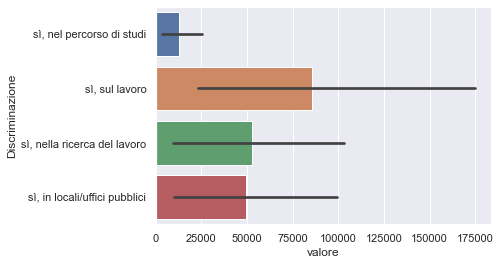

In [26]:
sns.barplot(data=discriminazioni, x='valore', y='Discriminazione', orient='h')

POVERTA'

In [27]:
poverta = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/poverta.csv")
poverta = poverta.rename(columns={'TIPO_DATO8' : 'tipo_dato', 'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
poverta = poverta.loc[poverta['tipo_dato']== 'FAM_POVASS']
poverta

,ITTER107,Territorio,tipo_dato,Tipo dato,TIME,periodo,valore,Flag Codes,Flags
0,IT,Italia,FAM_POVASS,famiglie in povertà assoluta (composizione % p...,2019,2019,100.0,NaN,NaN
10,ITCD,Nord,FAM_POVASS,famiglie in povertà assoluta (composizione % p...,2019,2019,43.4,NaN,NaN
20,ITC,Nord-ovest,FAM_POVASS,famiglie in povertà assoluta (composizione % p...,2019,2019,25.1,NaN,NaN
30,ITD,Nord-est,FAM_POVASS,famiglie in povertà assoluta (composizione % p...,2019,2019,18.3,NaN,NaN
40,ITE,Centro,FAM_POVASS,famiglie in povertà assoluta (composizione % p...,2019,2019,14.4,NaN,NaN
50,ITFG,Mezzogiorno,FAM_POVASS,famiglie in povertà assoluta (composizione % p...,2019,2019,42.2,NaN,NaN
60,ITF,Sud,FAM_POVASS,famiglie in povertà assoluta (composizione % p...,2019,2019,28.1,NaN,NaN
70,ITG,Isole,FAM_POVASS,famiglie in povertà assoluta (composizione % p...,2019,2019,14.1,NaN,NaN


Media del tasso di povertà familiare.

In [28]:
np.mean(poverta['valore'])

35.70000000000001

SERVIZI SOCIALI ED EDUCATIVI

In [29]:
serv_soc_edu = pd.read_csv(r"C:/Users/Utente/Desktop/DATI_PROGETTO/stranieri/servizi_soc_edu.csv")
serv_soc_edu = serv_soc_edu.rename(columns={'Seleziona periodo' : 'periodo', 'Value' : 'valore'})
serv_soc_edu = serv_soc_edu.loc[serv_soc_edu['TIPO_DATO_SERV_SOC'] == 'EX_100CH_Y0_2' ]
serv_soc_edu

,ITTER107,Territorio,TIPO_DATO_SERV_SOC,Tipo dato,TIPSERVSOC,Tipo di servizio socio-educativo,TIME,periodo,valore,Flag Codes,Flags
0,ITC13,Biella,EX_100CH_Y0_2,spesa dei comuni per 100 residenti 0-2 anni (e...,ALL,tutte le voci,2018,2018,1301.0,NaN,NaN
1,ITC14,Verbano-Cusio-Ossola,EX_100CH_Y0_2,spesa dei comuni per 100 residenti 0-2 anni (e...,ISERIDC,servizi integrativi per la prima infanzia,2018,2018,2.0,NaN,NaN
2,ITC32,Savona,EX_100CH_Y0_2,spesa dei comuni per 100 residenti 0-2 anni (e...,DNUR,asilo nido,2018,2018,838.0,NaN,NaN
3,ITD42,Udine,EX_100CH_Y0_2,spesa dei comuni per 100 residenti 0-2 anni (e...,ALL,tutte le voci,2018,2018,759.0,NaN,NaN
4,ITE32,Ancona,EX_100CH_Y0_2,spesa dei comuni per 100 residenti 0-2 anni (e...,DNUR,asilo nido,2018,2018,850.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1629,ITFG,Mezzogiorno,EX_100CH_Y0_2,spesa dei comuni per 100 residenti 0-2 anni (e...,ALL,tutte le voci,2018,2018,321.0,NaN,NaN
1642,ITFG,Mezzogiorno,EX_100CH_Y0_2,spesa dei comuni per 100 residenti 0-2 anni (e...,ISERIDC,servizi integrativi per la prima infanzia,2018,2018,9.0,NaN,NaN
1644,IT111,Sud Sardegna,EX_100CH_Y0_2,spesa dei comuni per 100 residenti 0-2 anni (e...,DNUR,asilo nido,2018,2018,257.0,NaN,NaN
1645,IT111,Sud Sardegna,EX_100CH_Y0_2,spesa dei comuni per 100 residenti 0-2 anni (e...,ISERIDC,servizi integrativi per la prima infanzia,2018,2018,16.0,NaN,NaN


Tipologia di spesa dei comuni per servizi destinati alla cura dei bambini.

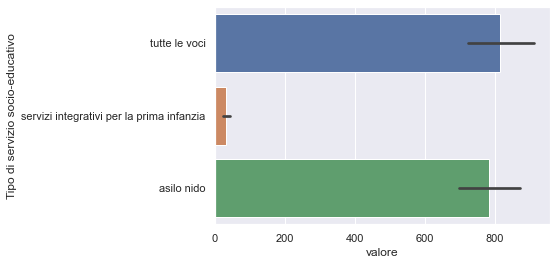

In [30]:
sns.barplot(data=serv_soc_edu, x='valore', y='Tipo di servizio socio-educativo')

+ **SOLUZIONI E COMMENTI**